### Student Information
Name:

Student ID: X1110032

GitHub ID: migueldo

Kaggle name: Miguel De Oliveira

Kaggle private scoreboard snapshot:

![Imgur](data/snapshot_11:22:2022.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__.

## Homework exercises
### 1. Data preparation

### Load Data

In [338]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
train_df = train_df.sample(frac=1)

In [339]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [340]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize

# extract the text from the train DataFrame
train_text_df = train_df.iloc[:, 1]

# remove all characters that are not letters
train_text_df = re.sub("[^a-zA-Z]", " ", str(train_text_df))

# tokenize the new DataFrame
word_tokenize(train_text_df)

# create a Dataframe where each element is a words from the texts
train_words = train_text_df.split()
train_words_df = pd.DataFrame(train_words)

# do the same thing for the test DataFrame
test_text_df = test_df.iloc[:, 1]
test_text_df = re.sub("[^a-zA-Z]", " ", str(test_text_df))
word_tokenize(test_text_df)
test_words = test_text_df.split()
test_words_df = pd.DataFrame(test_words)

[Text(0, 0, 'I'),
 Text(1, 0, 'to'),
 Text(2, 0, 'm'),
 Text(3, 0, 't'),
 Text(4, 0, 'BeaconNy'),
 Text(5, 0, 'ly'),
 Text(6, 0, 'object'),
 Text(7, 0, 'me'),
 Text(8, 0, 'makes'),
 Text(9, 0, 'maisi'),
 Text(10, 0, 'into'),
 Text(11, 0, 'live'),
 Text(12, 0, 'on'),
 Text(13, 0, 'helpful'),
 Text(14, 0, 'have'),
 Text(15, 0, 'fly'),
 Text(16, 0, 'fit'),
 Text(17, 0, 'excited'),
 Text(18, 0, 'of'),
 Text(19, 0, 'realDonaldTrump'),
 Text(20, 0, 'p'),
 Text(21, 0, 'elated'),
 Text(22, 0, 'rolling'),
 Text(23, 0, 'runway'),
 Text(24, 0, 'something'),
 Text(25, 0, 'stuck'),
 Text(26, 0, 'taking'),
 Text(27, 0, 'terrified'),
 Text(28, 0, 'text'),
 Text(29, 0, 'this')]

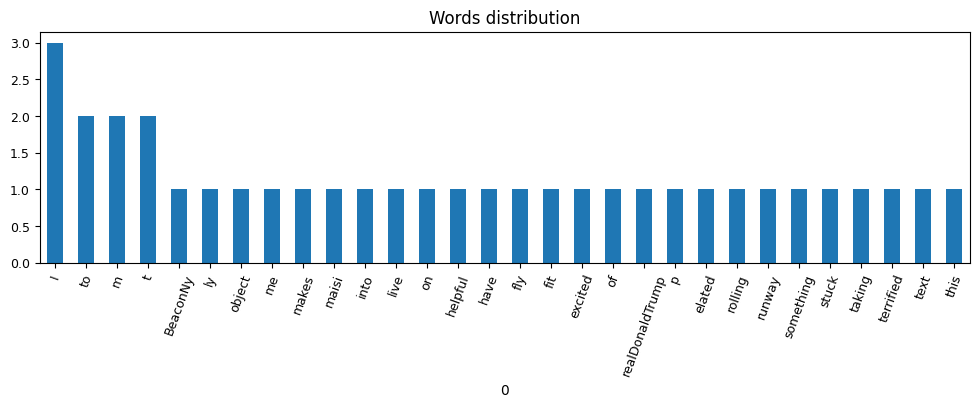

In [341]:
# get the number of occurrences for each word in the DataFrame
train_plot_df = train_words_df.value_counts()

# plot it in a bar chart
train_plt = train_plot_df.head(30).plot(kind = 'bar',
                                        title = 'Words distribution',
                                        rot = 70, fontsize = 9, figsize = (12,3))
labels = [re.sub("\(|\)|\,", "", item.get_text()) for item in train_plt.get_xticklabels()]
train_plt.set_xticklabels(labels)

[Text(0, 0, 'I'),
 Text(1, 0, 'of'),
 Text(2, 0, 's'),
 Text(3, 0, 'the'),
 Text(4, 0, 'it'),
 Text(5, 0, 'is'),
 Text(6, 0, 'one'),
 Text(7, 0, 'was'),
 Text(8, 0, 'has'),
 Text(9, 0, 'to'),
 Text(10, 0, 'this'),
 Text(11, 0, 'that'),
 Text(12, 0, 'p'),
 Text(13, 0, 'our'),
 Text(14, 0, 'oh'),
 Text(15, 0, 'object'),
 Text(16, 0, 'A'),
 Text(17, 0, 'nothi'),
 Text(18, 0, 'no'),
 Text(19, 0, 'pick'),
 Text(20, 0, 'natura'),
 Text(21, 0, 'nBogum'),
 Text(22, 0, 'my'),
 Text(23, 0, 'members'),
 Text(24, 0, 'nights'),
 Text(25, 0, 'serious'),
 Text(26, 0, 'reminds'),
 Text(27, 0, 'season'),
 Text(28, 0, 'world'),
 Text(29, 0, 'witches')]

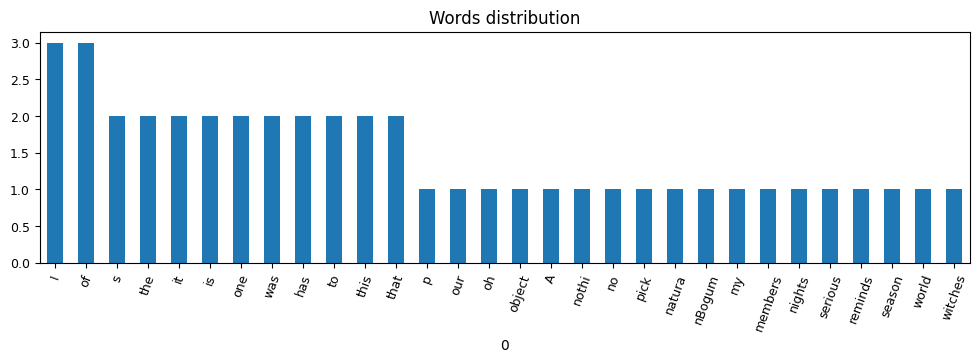

In [342]:
# do the same for the test DataFrame
test_plot_df = test_words_df.value_counts()

test_plt = test_plot_df.head(30).plot(kind = 'bar',
                                      title = 'Words distribution',
                                      rot = 70, fontsize = 9, figsize = (12,3))
labels = [re.sub("\(|\)|\,", "", item.get_text()) for item in test_plt.get_xticklabels()]
test_plt.set_xticklabels(labels)

### Exploratory data analysis (EDA)

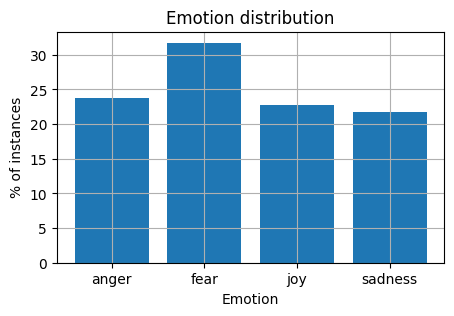

In [343]:
%matplotlib inline
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

### 2. Feature engineering

### Bag of Words

In [344]:
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

# check the result
print("[RESULT] {}".format(train_data_BOW_features))

# check the dimension
print("[SHAPE] {}".format(train_data_BOW_features.shape))

# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
print("[FEATURES] {}".format(feature_names[100:110]))

# check if some features are ignored
print("[IGNORED] {}".format("😂" in feature_names))

[RESULT]   (0, 246)	1
  (0, 1354)	1
  (0, 3115)	1
  (0, 3295)	1
  (0, 3349)	1
  (0, 4512)	1
  (0, 4571)	1
  (0, 6235)	1
  (0, 6371)	1
  (0, 7246)	1
  (0, 9119)	1
  (1, 1869)	1
  (1, 4021)	2
  (1, 4038)	1
  (1, 4039)	1
  (1, 4383)	1
  (1, 4772)	1
  (1, 5326)	1
  (1, 6517)	1
  (1, 6676)	1
  (1, 7046)	1
  (1, 7320)	1
  (1, 7655)	1
  (1, 7906)	1
  (1, 8924)	1
  :	:
  (3611, 14)	1
  (3611, 371)	1
  (3611, 1026)	1
  (3611, 1991)	1
  (3611, 2400)	1
  (3611, 2580)	1
  (3611, 3152)	1
  (3611, 3380)	1
  (3611, 3391)	1
  (3611, 4212)	1
  (3611, 4798)	1
  (3611, 5746)	1
  (3611, 5853)	1
  (3611, 6191)	1
  (3611, 6379)	1
  (3611, 6422)	1
  (3611, 6635)	1
  (3611, 7721)	1
  (3611, 8570)	1
  (3611, 8930)	1
  (3611, 9119)	1
  (3611, 9129)	1
  (3611, 9694)	1
  (3612, 897)	1
  (3612, 1197)	1
[SHAPE] (3613, 10115)
[FEATURES] ['2k17' '2much' '2nd' '30' '300' '301' '30am' '30pm' '30s' '31']
[IGNORED] False


using a different tokenizer

In [345]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

# check the result
print("[RESULT] {}".format(train_data_BOW_features_500))

# check the dimension
print("[SHAPE] {}".format(train_data_BOW_features_500.shape))

# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
print("[FEATURES] {}".format(feature_names_500[100:110]))

# check if some features are ignored
print("[IGNORED] {}".format("😂" in feature_names_500))

[RESULT]   (0, 8)	1
  (0, 10)	1
  (0, 30)	1
  (0, 33)	1
  (0, 34)	1
  (0, 213)	1
  (0, 218)	1
  (0, 220)	1
  (0, 292)	1
  (0, 295)	1
  (0, 334)	1
  (0, 429)	1
  (1, 10)	1
  (1, 18)	1
  (1, 30)	4
  (1, 194)	2
  (1, 216)	1
  (1, 311)	1
  (1, 338)	1
  (1, 410)	1
  (1, 411)	1
  (1, 429)	1
  (2, 1)	2
  (2, 30)	1
  (2, 47)	1
  :	:
  (3609, 130)	1
  (3609, 213)	3
  (3609, 377)	1
  (3609, 398)	1
  (3609, 432)	1
  (3610, 5)	1
  (3610, 19)	1
  (3610, 134)	1
  (3610, 264)	1
  (3610, 411)	1
  (3610, 426)	1
  (3611, 18)	2
  (3611, 26)	1
  (3611, 30)	1
  (3611, 38)	1
  (3611, 76)	1
  (3611, 150)	1
  (3611, 226)	1
  (3611, 269)	1
  (3611, 291)	1
  (3611, 302)	1
  (3611, 411)	1
  (3611, 429)	1
  (3611, 431)	1
  (3612, 84)	1
[SHAPE] (3613, 500)
[FEATURES] ['change' 'cheer' 'cheerful' 'cheerfully' 'cheering' 'cheery' 'come'
 'comes' 'could' 'country']
[IGNORED] True


### Exercise 2

In [346]:
from sklearn.feature_extraction.text import TfidfVectorizer

# build the tf-idf vect
tf_vect = TfidfVectorizer()
tf_vect.fit(train_df.text)

# build the train & test matrix
train_tf = tf_vect.transform(train_df.text)
test_tf = tf_vect.transform(test_df.text)

print(type(train_tf)) # check type
print(train_tf.shape) # check dimension
print()
print(type(test_tf))
print(test_tf.shape)

tf_vect.get_feature_names_out()[100:110]

<class 'scipy.sparse._csr.csr_matrix'>
(3613, 10115)

<class 'scipy.sparse._csr.csr_matrix'>
(347, 10115)


array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

### 3. Model

In [347]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 4. Results Evaluation

In [348]:
## accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# calculating the accuracy score for both train & test
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score (more details)
print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.99
testing accuracy: 0.68
              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [349]:
# Funciton for visualizing confusion_matrix
import seaborn as sns
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

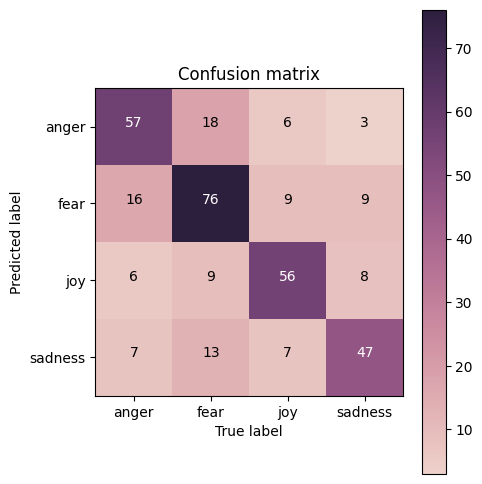

In [350]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### Exercise 3

This diagram is a confusion matrix which represents the frequency of an output based on an input. It gives a visual approach to an algorithm precision.
Here we can see that for each category in most cases we can predict them however we still have quite a lot of errors (~35% for anger and fear and~ 30% for joy and sadness). From this confusion matrix we can say that our current algorithm has an approximate precision of 65 to 70%.

### Exercise 4

In [351]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# build the MultinomialNaiveBayes classifier
mnb = MultinomialNB()

# fit the classifier to the train data
mnb.fit(X_train, y_train)

# calculate the mean accuracy on the test data
mnb_score = mnb.score(X_test, y_test)
print("[MNB SCORE] {}".format(mnb_score))

# calculate the predictions
y_train_pred = mnb.predict(X_train)
y_test_pred = mnb.predict(X_test)

# calculate the classifier accuracy score
acc_score = accuracy_score(y_train, y_train_pred)
print("[TRAINING ACCURACY] {}".format(acc_score))
acc_score = accuracy_score(y_test, y_test_pred)
print("[TEST ACCURACY] {}".format(acc_score))

# build the classification report
print(classification_report(y_true=y_test, y_pred=y_test_pred))


[MNB SCORE] 0.6974063400576369
[TRAINING ACCURACY] 0.7918627179629117
[TEST ACCURACY] 0.6974063400576369
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



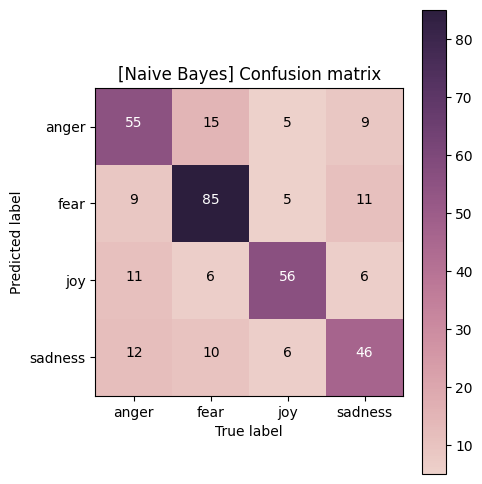

In [352]:
# plot the confusion matrix
nb_cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
plot_confusion_matrix(nb_cm, classes=my_tags, title='[Naive Bayes] Confusion matrix')

### Exercise 5

On both the Naive Bayes and the Decision Tree models we get roughly the same test accuracy around 68-69%. However on the bayesian model we have more difference between the 2 most accurate emotions (fear & joy) and the 2 lest accurate (anger & sadness). This is due to the fact that bayesian models perform best on independant data and fear and joy are the 2 most different emotions among the 4.

### 6. Deep Learning

In [353]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [354]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 34      anger
2634      joy
2336      joy
2447      joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [355]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

input_shape:  500
output_shape:  4
Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 500)]             0         
                                                                 
 dense_33 (Dense)            (None, 64)                32064     
                                                                 
 re_lu_22 (ReLU)             (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 re_lu_23 (ReLU)             (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 4)                 260       
                                                                 
 softmax_11 (Softmax)  

In [356]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 0s 2ms/step - loss: 1.3220 - accuracy: 0.3792 - val_loss: 1.2819 - val_accuracy: 0.4553
Epoch 2/25
113/113 [==============================] - 0s 916us/step - loss: 0.9840 - accuracy: 0.6479 - val_loss: 0.9190 - val_accuracy: 0.6657
Epoch 3/25
113/113 [==============================] - 0s 1ms/step - loss: 0.5817 - accuracy: 0.7957 - val_loss: 0.7859 - val_accuracy: 0.7032
Epoch 4/25
113/113 [==============================] - 0s 933us/step - loss: 0.4143 - accuracy: 0.8480 - val_loss: 0.7995 - val_accuracy: 0.6974
Epoch 5/25
113/113 [==============================] - 0s 978us/step - loss: 0.3295 - accuracy: 0.8826 - val_loss: 0.8250 - val_accuracy: 0.7061
Epoch 6/25
113/113 [==============================] - 0s 988us/step - loss: 0.2689 - accuracy: 0.9070 - val_loss: 0.8750 - val_accuracy: 0.6772
Epoch 7/25
113/113 [==============================] - 0s 999us/step - loss: 0.2213 - accuracy: 0.9264 - val_loss: 0.9681 - val_accuracy: 0.6

In [357]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 1ms/step


array([[2.33958053e-06, 6.69489373e-06, 9.99990463e-01, 4.48629123e-07],
       [2.66664557e-07, 9.99364555e-01, 1.11351234e-10, 6.35200180e-04],
       [7.46269286e-01, 2.49059930e-01, 2.47736741e-03, 2.19338946e-03],
       [9.60062206e-01, 1.35151407e-04, 1.14127026e-04, 3.96884494e-02],
       [2.49590911e-02, 1.67872354e-01, 1.38588861e-04, 8.07029903e-01]],
      dtype=float32)

In [358]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'fear', 'anger', 'anger', 'sadness'], dtype=object)

In [359]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [360]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.379186,1.322034,0.455331,1.281942
1,1,0.647938,0.984044,0.665706,0.918990
2,2,0.795738,0.581748,0.703170,0.785909
3,3,0.848049,0.414331,0.697406,0.799457
4,4,0.882646,0.329530,0.706052,0.824994
5,5,0.907003,0.268854,0.677233,0.874986
6,6,0.926377,0.221328,0.674352,0.968087
7,7,0.940769,0.185914,0.680115,1.040696
8,8,0.949626,0.161678,0.671470,1.059801
9,9,0.958206,0.140024,0.688761,1.100645


### Exercise 6

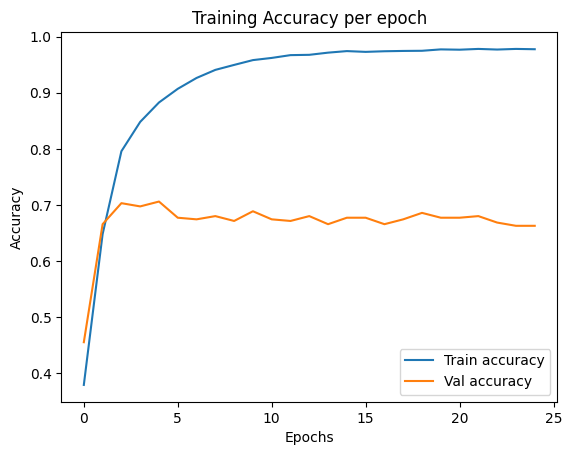

In [361]:
import matplotlib.pyplot as plt

# input the 2 value arrays in the plot
plt.plot(training_log.iloc[:,0], training_log.iloc[:,1], label= "Train accuracy")
plt.plot(training_log.iloc[:,0], training_log.iloc[:,3], label= "Val accuracy")

# add the title and axis names
plt.title('Training Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

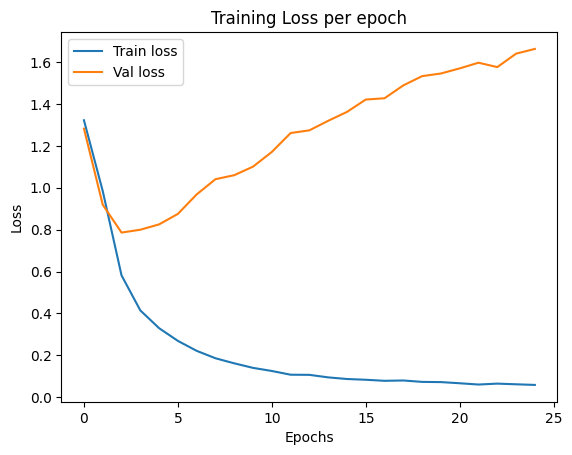

In [362]:
# input the 2 value arrays in the plot
plt.plot(training_log.iloc[:,0], training_log.iloc[:,2], label= "Train loss")
plt.plot(training_log.iloc[:,0], training_log.iloc[:,4], label= "Val loss")

# add the title and axis names
plt.title('Training Loss per epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Word2Vec

In [363]:
import warnings
warnings.filterwarnings('ignore')

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))

## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'bringyouhome2', 'I', "'m", 'about', 'to', 'fly', 'into', 'a', 'fit', 'of', 'rage', 'it', "'s", 'not', 'FAIR']),
       list(['@', 'ColMorrisDavis', '@', 'rolling_2', '@', 'realDonaldTrump', '@', 'pbump', 'He', "'s", 'jubilant', 'to', 'hear', 'the', 'word', 'that', 'he', 'probably', 'uses', 'in', 'secret', 'heard', 'out', 'loud', '.']),
       list(['Watch', 'this', 'amazing', 'live.ly', 'broadcast', 'by', '@', 'maisiev', '#', 'lively', '#', 'musically'])],
      dtype=object)

In [364]:
# training the model
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

In [365]:
word_vec = word2vec_model.wv['happy']
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('help', 0.9093348979949951),
 ('O', 0.9031190276145935),
 ('bday', 0.9027395844459534),
 ('Be', 0.9018595218658447),
 ('birthday', 0.8964078426361084),
 ('smile', 0.8939427137374878),
 ('establishment', 0.8923559188842773),
 ('November', 0.8873825073242188),
 ('cry', 0.8854249119758606),
 ('👌', 0.8846833109855652)]

In [366]:
# using a pretrained model
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [367]:
# using a pretrained model through gensim API
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.9336148500442505),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158350825309753),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248763084412),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

### Exercise 7

In order to train our model we need to create a representation that summerize the sentences. To do so we can utilize the vectors computed from the words (with word2vec for example) of a given sentence and compute the average vector based on all of these. This way our average vector can represent a sentence and be utilized to train the model.

### 9. High-dimension Visualization: t-SNE

In [368]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


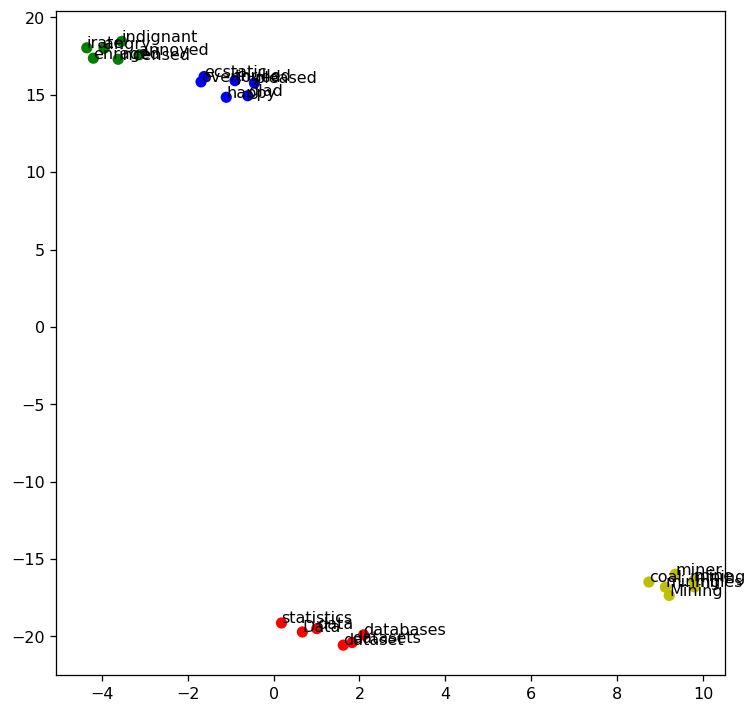

In [369]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### Exercise 8

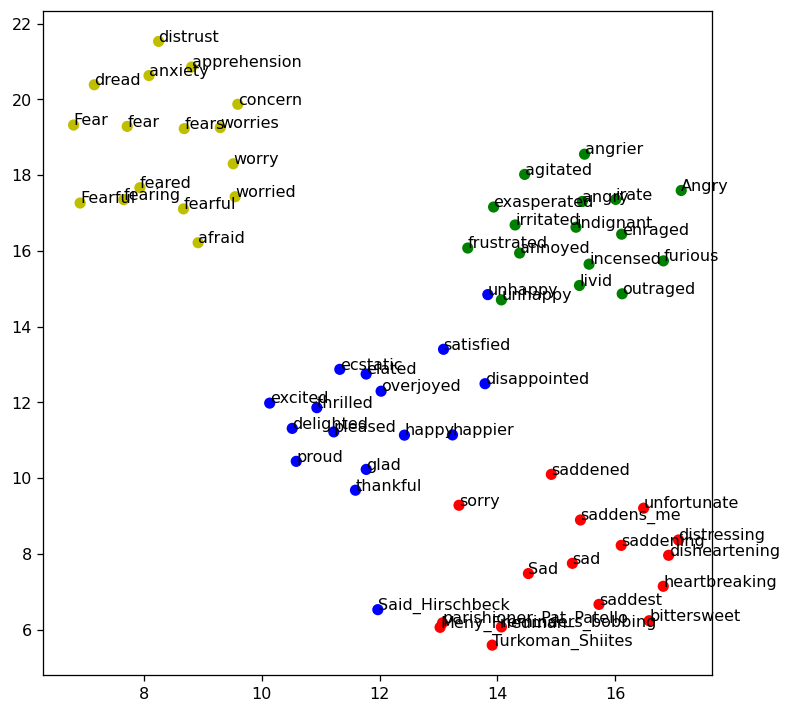

In [370]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]
target_words = happy_words + angry_words + sad_words + fear_words

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn


## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Kaggle competition

### Approach

#### Pre-processing
For the pre-processing my goal is to remove has useless information as possible. I considered as useless all the following:
- user tagings
- links
- punctuation
- weird tags probably coming from an encoding format
Also to be able to create meaningful vectors I changed all my text to lowercase.
I also chose to keep the hashtags due to the later use of the TweetTokenizer.

#### Feature Engineering
For this part I found the TweetTokenizer made available by nltk to tokenize tweets adding the handling of hashtags to word_tokenizer.
From this tokenizer I build my vector which allow me to generate my token matrix.

#### model
For the model I used the basic deep learning model provided by this lab.

#### improvements
For the preprocessing part handling slang words could improvements the training. This could be achieved by gathering all the non english words and build a dictionnary mapping whose word to a proper english traduction.

### Imports

In [371]:
import re
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Setup

In [372]:
# list of the emotions to recognize
emotions_list = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']

# importing the input csv files as DataFrames
data_identification = pd.read_csv("data/data_identification.csv", sep=",", header=1,
                                  names=["tweet_id", "identification"])
data_emotions = pd.read_csv("data/emotion.csv", sep=",", header=1,
                            names=["tweet_id", "emotion"])
data_tweets = []
with open('data/tweets_DM.json') as json_file:
    for json_line in json_file.readlines():
        data_tweets.append(json.loads(json_line))
tweets_df = pd.DataFrame(data_tweets)

### Data cleaning

In [388]:
# function to clean an tweet in it's text format
def text_cleaner(text):
    text = text.lower()  #  lowercase text
    text = re.sub('<lh>', '', text) # remove the <lh> tag
    text = re.sub('@\w+', '', text) # remove all the user Twitter tags
    text = re.sub('https?://[A-Za-z0-9./]+','', text) # remove all the links
    text = text.replace(u"\ufffd", "?") # remove the ufffd tag
    text = re.sub("[^a-zA-Z#]", "", text)  # remove punctuation and numbers
    text = " ".join(text.split())  # remove extra spaces, tabs, and new lines
    return text

In [389]:
# building a new array with the tweet_id and it's cleaned text
tweets_df = []
for tweet in data_tweets:
    tweets_df.append({
        'tweet_id': tweet['_source']['tweet']['tweet_id'],
        'text': text_cleaner(tweet['_source']['tweet']['text']),
    })
# building a DataFrame from this array
tweets_df = pd.DataFrame(tweets_df)
# merge the new DataFrame with the identifications DataFrame
tweets_df = pd.merge(tweets_df, data_identification, on="tweet_id")

In [375]:
# create a train DataFrame and merge it with the emotions DataFrame
train_df = tweets_df[tweets_df['identification']=='train']
train_df = pd.merge(train_df, data_emotions, on='tweet_id')

# create a test DataFrame and add an empty emotion column
test_df = tweets_df[tweets_df['identification']=='test']
test_df["emotion"]=""

In [376]:
# drop the identification and hashtags column
train_df = train_df.drop(['identification'], axis=1)
test_df = test_df.drop(['identification'], axis=1)

In [387]:
train_df[:20]

,tweet_id,text,emotion
0,0x376b20,people who post add me on snapchat must be deh...,anticipation
1,0x2d5350,as we see trump is dangerous to freepress arou...,sadness
2,0x1cd5b0,now issa is stalking tasha 😂😂😂,fear
3,0x1d755c,thx for the best time tonight what stories hea...,joy
4,0x2c91a8,still waiting on those supplies liscus,anticipation
5,0x368e95,love knows no gender 😢😭,joy
6,0x249c0c,more highlights are being shown than actual sp...,sadness
7,0x359db9,the ssm debate a manufactured fantasy used to ...,anticipation
8,0x23b037,i love suffering 🙃🙃 i love when valium does no...,joy
9,0x1fde89,can someone tell my why my feeds scroll back t...,anger


### Training

In [377]:
import nltk
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer

In [378]:
# tokenize text based on nltk TweetTokenizer function
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

# build the vectorizer to generate the token matrix
vect = CountVectorizer(max_features=100000, tokenizer=tokenizer).fit(train_df['text'])
bow_transformed = vect.transform(train_df['text'])

### Model

In [381]:
# build the train and test matrix
X_train = bow_transformed
y_train = train_df['emotion']
X_test = vect.transform(test_df['text'])
y_test = test_df['emotion']

In [382]:
from sklearn.preprocessing import LabelEncoder

# label encode our train list of emotions
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:8])
print('\ny_train.shape: ', y_train.shape)

# function to encode the labels by mapping each label to a number here from 0 to 7 (8 emotions)
def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

# function to decode the labels
def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

# transform our train list of labels into an encoded one
y_train = label_encode(label_encoder, y_train)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 0    anticipation
1         sadness
2            fear
3             joy
4    anticipation
5             joy
6         sadness
7    anticipation
Name: emotion, dtype: object

y_train.shape:  (1455562,)


In [383]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# generate the input/output shapes (dimensions)
input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 100000)]          0         
                                                                 
 dense_36 (Dense)            (None, 64)                6400064   
                                                                 
 re_lu_24 (ReLU)             (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 re_lu_25 (ReLU)             (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 8)                 520       
                                                                 
 softmax_12 (Softmax)        (None, 8)                 0  

In [384]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 10
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger])

print('training finish')

45487/45487 [==============================] - 585s 13ms/step - loss: 1.2619 - accuracy: 0.5443
training finish


In [385]:
# compute our prediction
prediction = model.predict(X_test, batch_size=128)
prediction = label_decode(label_encoder, prediction)

3219/3219 [==============================] - 3s 789us/step


In [386]:
# save our prediction as a csv file
test_df['emotion'] = prediction
csv_data = test_df[['tweet_id', 'emotion']].copy()
csv_data = csv_data.set_axis(["id", "emotion"], axis=1)
csv_data.to_csv("X1110032_submission.csv", index=False)